Salim Chemlal Thu Oct 06 2016 12:11:34 

CPython 2.7.11
IPython 4.1.2

Total number of glucose readings is: 7642

Some of points may be missing glucose readings, the above number represents the collected readings from start to end date

Remove NaN from the mg/dL column... 
Total actual number of glucose readings is: 4353

Remove NaN from the CHO so we can plot the points of meals...
Total number of meal times: 210

Some of the meal times do not have corresponding glucose reading, as it was not recorded at that time.
Thus, total actual number of meal times with glucose readings is: 209

Some of the successive meal readings are redundant and stand for one meal only

Remove redundant readings of same meal...

There are 89  unredundant recorded glucose readings with meal times.

                 Date  mg/dL  CHO (g)
0 2008-07-08 17:47:00  107.0    6.740
1 2008-07-08 18:32:00   79.0   10.832
2 2008-07-08 20:02:00  106.0    0.380
3 2008-07-09 07:12:00  139.0    7.190
4 2008-07-09 07:32:00  1

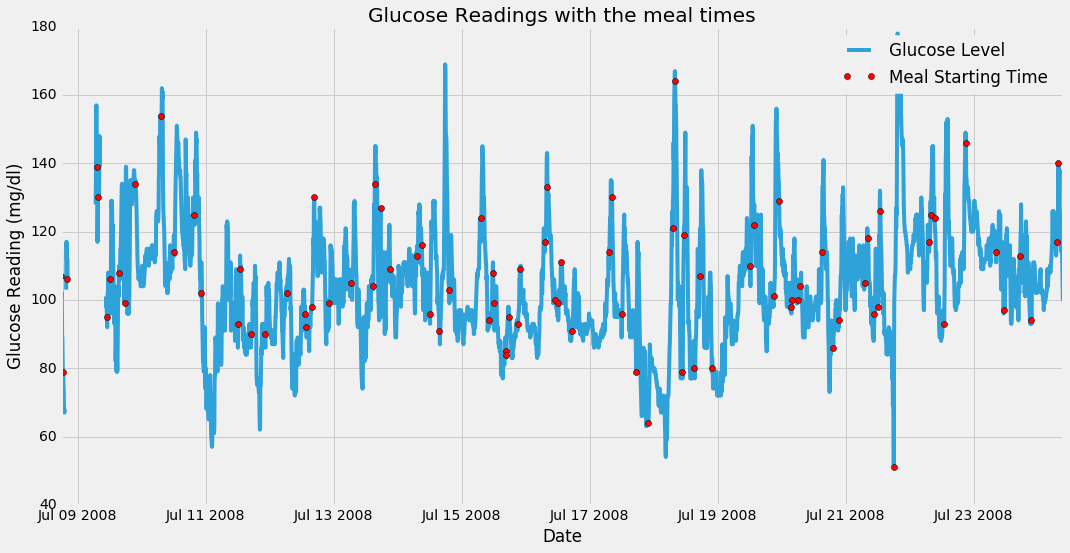

In [40]:
#An IPython magic extension for printing date and time stamps, version numbers, and hardware information. 
#%load_ext watermark 
%watermark -a "Salim Chemlal" -n -t -v 
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime, date, time
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
#This is graph line style, from Nate silver
plt.style.use('fivethirtyeight')

_DATA_DIR = r'C:\Users\engadmin\Desktop\Diabetes  Project Code\Input\input'
_FIG_DIR = r'C:\Users\engadmin\Desktop\Diabetes  Project Code\figures'

if not os.path.exists(_FIG_DIR):
    os.makedirs(_FIG_DIR)
    
_GULCOSE_DATA_PATH = os.path.join(_DATA_DIR, 'P2.csv')
fields = ["Date", "mg/dL", "CHO (g)"]
df = pd.read_csv(_GULCOSE_DATA_PATH, parse_dates=['Date'], usecols = fields) #read and prase Date col as dataTimes object
df = df.sort(['Date'])
#print df.head()
#print '\n Data Types:'
#print df.dtypes

## Matplotlib Variables
_FIG_SIZE = (16, 8)
_FIG_FORMAT = 'png'
_FIG_DPI = 200

def _file_format(string_):
    string_ = string_.replace('-', '_').replace(' ', '_').replace('$', '')
    string_ += '.' + _FIG_FORMAT
    return string_

def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

print "\nTotal number of glucose readings is:", df['mg/dL'].size
print "\nSome of points may be missing glucose readings, the above number represents the collected readings from start to end date"
#Removing NaN from a specific column of the dataframe, here it's mg/dL
df_wonan_mg = df.dropna(subset=['mg/dL'])
print "\nRemove NaN from the mg/dL column...", "\nTotal actual number of glucose readings is:", df_wonan_mg['mg/dL'].size
###################
#Converting object type to float for all of the dataframe
df2= pd.DataFrame(df).convert_objects(convert_numeric=True)
#print df2.dtypes
print "\nRemove NaN from the CHO so we can plot the points of meals..."
#Removing NaN from a specific column of the dataframe, here it's CHO. isfinite can work for series, but not for dataframe
df2 = df2.dropna(subset=['CHO (g)'])
#print "\n", df2.head()
print "Total number of meal times:", df2['CHO (g)'].size
print "\nSome of the meal times do not have corresponding glucose reading, as it was not recorded at that time."
#Removing NaN from a specific column of the dataframe, here it's mg/dL
df2_wonan_mg = df2.dropna(subset=['mg/dL'])
print "Thus, total actual number of meal times with glucose readings is:", df2_wonan_mg['mg/dL'].size
print "\nSome of the successive meal readings are redundant and stand for one meal only"
########################
#resetting dataframe index
df3 = df2_wonan_mg.reset_index(drop=True)
#print df3.head()

df4 = pd.DataFrame(df3)   
#print df4.head()

#print_full(df4)  

print '\nRemove redundant readings of same meal...\n' 
row = 0
for i, x in enumerate(df3['CHO (g)']):
        if i > 0:
            row = row + 1
            #if content of current element is same as previous, then delete row      
            #resetting dataframe index
            if x == df3['CHO (g)'][i-1]:
                #print '\nRemove redudant readings rows', i, x
                #drop ith row
                df4.drop(df4.index[row], axis=0, inplace=True)
                row = row - 1
#print_full(df4)  
                
#resetting dataframe index (1,2,3...)
df4 = df4.reset_index(drop=True)
print "There are", df4['CHO (g)'].size, " unredundant recorded glucose readings with meal times.\n"

print df4.head()
#print df4

#reindexing the dataframe with the Date column-- This will remove Date column but that is needed for graphing
#df4 = df4.set_index('Date')

plt.figure(figsize=_FIG_SIZE)
plt.plot_date(df.Date, df['mg/dL'], '-', label="Glucose Level");
plt.plot_date(df4.Date, df4['mg/dL'], 'ro', label="Meal Starting Time")
plt.xlabel('Date')
plt.ylabel('Glucose Reading (mg/dl)')
plt.legend(loc='upper right')
title = 'Glucose Readings with the meal times'
plt.title(title);
#change title to include date of first index and last index
#title = 'Glucose readings for P1 between {} - 2008-07-27'.format(_BEGINNING_DATE)
fig_path = os.path.join(_FIG_DIR, _file_format(title))
plt.savefig(fig_path, dpi=_FIG_DPI)


In [42]:
#This cell is for the interactive plotting using bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.models.markers import Asterisk
from bokeh.models import ColumnDataSource, DataRange1d, Plot, LinearAxis, Grid
from bokeh.models import HoverTool

# output to static HTML file
output_file("lines.html")

plot = figure(plot_width=1850, plot_height=900, title="Glucose Readings Interactive Plot",
              tools='pan,wheel_zoom,reset,box_zoom,save, undo', x_axis_type='datetime')

plot.line(df.Date, df['mg/dL'],  line_width=2, line_alpha=0.6)
plot.square(df.Date, df['mg/dL'], legend="Glucose Readings", fill_color=None, line_color="green")

source = ColumnDataSource(dict(x=df4.Date, y=df4['mg/dL']))

glyph_1 = Asterisk(x="x", y="y", line_color="#f0027f", fill_color=None, line_width=8)
plot.add_glyph(source, glyph_1)

# show the results
show(plot)